In [509]:
import pandas as pd
from pandas import Series,DataFrame
import sys

In [510]:
df = pd.read_csv('STATSNZ-Income-Regions.csv')

In [511]:
df.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,CEN23_YEAR_001,Census year,CEN23_GEO_014,Area,CEN23_TIF_001,Total family income,CEN23_FAF_003,Family type,OBS_VALUE,Observation Value,OBS_STATUS,Observation Status
0,DATAFLOW,STATSNZ:CEN23_FHH_042(1.0),Total family income and family type for famili...,I,2013,2013,1,Northland Region,1,"$20,000 or less",1,NaN,840.0,NaN,NaN,NaN
1,DATAFLOW,STATSNZ:CEN23_FHH_042(1.0),Total family income and family type for famili...,I,2013,2013,1,Northland Region,1,"$20,000 or less",2,NaN,453.0,NaN,NaN,NaN
2,DATAFLOW,STATSNZ:CEN23_FHH_042(1.0),Total family income and family type for famili...,I,2013,2013,1,Northland Region,1,"$20,000 or less",3,NaN,2103.0,NaN,NaN,NaN
3,DATAFLOW,STATSNZ:CEN23_FHH_042(1.0),Total family income and family type for famili...,I,2013,2013,1,Northland Region,1,"$20,000 or less",99,NaN,3402.0,NaN,NaN,NaN
4,DATAFLOW,STATSNZ:CEN23_FHH_042(1.0),Total family income and family type for famili...,I,2013,2013,1,Northland Region,2,"$20,001-$30,000",1,NaN,1902.0,NaN,NaN,NaN


In [512]:
df.astype({'Family type': 'str'}).dtypes

STRUCTURE               object
STRUCTURE_ID            object
STRUCTURE_NAME          object
ACTION                  object
CEN23_YEAR_001           int64
Census year              int64
CEN23_GEO_014            int64
Area                    object
CEN23_TIF_001           object
Total family income     object
CEN23_FAF_003            int64
Family type             object
OBS_VALUE              float64
Observation Value      float64
OBS_STATUS              object
Observation Status      object
dtype: object

In [513]:
def family_type(family):
    CEN23_FAF_003 = family
    if CEN23_FAF_003 == 1:
        return 'Couple without children'
    elif CEN23_FAF_003 == 2:
        return 'Couple with children'
    elif CEN23_FAF_003 == 3:
        return 'One parent with child(ren)'
    else: 
        return 'Total'
    

In [514]:
df['Family type'] = df['CEN23_FAF_003'].apply(family_type)

In [515]:
df['Observation Value'] = df['OBS_VALUE']

In [516]:
df = df.drop(columns=['STRUCTURE','STRUCTURE_ID','STRUCTURE_NAME','ACTION','CEN23_YEAR_001','CEN23_GEO_014','CEN23_TIF_001','CEN23_FAF_003','OBS_VALUE','OBS_STATUS','Observation Status'], axis=1)

In [517]:
filter = df['Family type'].str.contains('Total')
df = df[~filter]

In [518]:
filter = df['Total family income'].str.contains('Total')
df = df[~filter]

In [519]:
df.head()

,Census year,Area,Total family income,Family type,Observation Value
0,2013,Northland Region,"$20,000 or less",Couple without children,840.0
1,2013,Northland Region,"$20,000 or less",Couple with children,453.0
2,2013,Northland Region,"$20,000 or less",One parent with child(ren),2103.0
4,2013,Northland Region,"$20,001-$30,000",Couple without children,1902.0
5,2013,Northland Region,"$20,001-$30,000",Couple with children,570.0


In [520]:
df_median_filter = df['Total family income'].str.contains('Median')
df_median = df[df_median_filter]
df_median = df_median.drop(columns='Total family income',axis=1)
df_median.columns.name = 'ID'

In [521]:
df_median.reset_index(inplace = True, drop = True)

In [522]:
df_median.head()

ID,Census year,Area,Family type,Observation Value
0,2013,Northland Region,Couple without children,56200.0
1,2013,Northland Region,Couple with children,75800.0
2,2013,Northland Region,One parent with child(ren),27800.0
3,2013,Auckland Region,Couple without children,76900.0
4,2013,Auckland Region,Couple with children,97800.0


In [524]:
df_median.reset_index(inplace = True, drop=True)

In [525]:
df_median

ID,Census year,Area,Family type,Observation Value
0,2013,Northland Region,Couple without children,56200.0
1,2013,Northland Region,Couple with children,75800.0
2,2013,Northland Region,One parent with child(ren),27800.0
3,2013,Auckland Region,Couple without children,76900.0
4,2013,Auckland Region,Couple with children,97800.0
...,...,...,...,...
139,2023,Nelson Region,Couple with children,126600.0
140,2023,Nelson Region,One parent with child(ren),52200.0
141,2023,Marlborough Region,Couple without children,88200.0
142,2023,Marlborough Region,Couple with children,127000.0


In [526]:
df = df[~df_median_filter]

In [527]:
df.reset_index(inplace = True, drop = True)

In [528]:
df.head(10)

,Census year,Area,Total family income,Family type,Observation Value
0,2013,Northland Region,"$20,000 or less",Couple without children,840.0
1,2013,Northland Region,"$20,000 or less",Couple with children,453.0
2,2013,Northland Region,"$20,000 or less",One parent with child(ren),2103.0
3,2013,Northland Region,"$20,001-$30,000",Couple without children,1902.0
4,2013,Northland Region,"$20,001-$30,000",Couple with children,570.0
5,2013,Northland Region,"$20,001-$30,000",One parent with child(ren),1689.0
6,2013,Northland Region,"$30,001-$50,000",Couple without children,4506.0
7,2013,Northland Region,"$30,001-$50,000",Couple with children,1875.0
8,2013,Northland Region,"$30,001-$50,000",One parent with child(ren),1740.0
9,2013,Northland Region,"$50,001-$70,000",Couple without children,2844.0


In [529]:
filter = df_median['Census year'] == 2013
df_median_order = df_median[filter]
df_median_order = df_median_order.drop(columns='Census year')
df_median_order = df_median_order.rename(columns={'Observation Value':'2013'})
df_median_order.head()

ID,Area,Family type,2013
0,Northland Region,Couple without children,56200.0
1,Northland Region,Couple with children,75800.0
2,Northland Region,One parent with child(ren),27800.0
3,Auckland Region,Couple without children,76900.0
4,Auckland Region,Couple with children,97800.0


In [530]:
filter = df_median['Census year'] == 2018
df_median_2018 = df_median[filter]
df_median_2018 = df_median_2018['Observation Value']
df_median_2018.reset_index(inplace = True, drop = True)
df_median_2018.head()

0     64300.0
1     92000.0
2     33000.0
3     89500.0
4    122000.0
Name: Observation Value, dtype: float64

In [531]:
filter = df_median['Census year'] == 2023
df_median_2023 = df_median[filter]
df_median_2023 = df_median_2023['Observation Value']
df_median_2023.reset_index(inplace = True, drop = True)
df_median_2023.head()

0     76800.0
1    120300.0
2     49600.0
3    108100.0
4    146900.0
Name: Observation Value, dtype: float64

In [533]:
filter = df_median['Census year'] == 2013
df_median_2013 = df_median[filter]
df_median_2013.reset_index(inplace = True, drop = True)
df_mediannp2013 = df_median[filter]
df_mediannp2013.reset_index(inplace = True, drop = True)
df_median_2013 = df_median_2013.pivot(index='Area', columns=['Family type'], values = 'Observation Value')
df_median_2013 = df_median_2013.rename(columns={'Couple with children':'Couple with children 2013','Couple without children':'Couple without children 2013','One parent with child(ren)':'One parent with child(ren) 2013'})
df_median_2013

Family type,Couple with children 2013,Couple without children 2013,One parent with child(ren) 2013
Area,,,
Auckland Region,97800.0,76900.0,35900.0
Bay of Plenty Region,83800.0,63300.0,29600.0
Canterbury Region,93300.0,71800.0,36000.0
Gisborne Region,76000.0,63800.0,26800.0
Hawke's Bay Region,82300.0,63600.0,29300.0
Manawatū-Whanganui Region,80200.0,62000.0,29200.0
Marlborough Region,82900.0,64000.0,30200.0
Nelson Region,80300.0,67100.0,31300.0
Northland Region,75800.0,56200.0,27800.0


In [534]:
filter = df_median['Census year'] == 2018
df_median_2018 = df_median[filter]
df_median_2018.reset_index(inplace = True, drop = True)
df_mediannp2018 = df_median[filter]
df_mediannp2018.reset_index(inplace = True, drop = True)
df_median_2018 = df_median_2018.pivot(index='Area', columns=['Family type'], values = 'Observation Value')
df_median_2018 = df_median_2018.rename(columns={'Couple with children':'Couple with children 2018','Couple without children':'Couple without children 2018','One parent with child(ren)':'One parent with child(ren) 2018'})
df_median_2018

Family type,Couple with children 2018,Couple without children 2018,One parent with child(ren) 2018
Area,,,
Auckland Region,122000.0,89500.0,46700.0
Bay of Plenty Region,103400.0,72700.0,37000.0
Canterbury Region,111100.0,82400.0,43200.0
Gisborne Region,91300.0,70300.0,32500.0
Hawke's Bay Region,98800.0,73100.0,36700.0
Manawatū-Whanganui Region,94600.0,69900.0,36000.0
Marlborough Region,100300.0,73400.0,39400.0
Nelson Region,95700.0,76300.0,36900.0
Northland Region,92000.0,64300.0,33000.0


In [535]:
filter = df_median['Census year'] == 2023
df_median_2023 = df_median[filter]
df_median_2023.reset_index(inplace = True, drop = True)
df_mediannp2023 = df_median[filter]
df_mediannp2023.reset_index(inplace = True, drop = True)
df_median_2023 = df_median_2023.pivot(index='Area', columns=['Family type'], values = 'Observation Value')
df_median_2023 = df_median_2023.rename(columns={'Couple with children':'Couple with children 2023','Couple without children':'Couple without children 2023','One parent with child(ren)':'One parent with child(ren) 2023'})
df_median_2023

Family type,Couple with children 2023,Couple without children 2023,One parent with child(ren) 2023
Area,,,
Auckland Region,146900.0,108100.0,60000.0
Bay of Plenty Region,132800.0,88800.0,54500.0
Canterbury Region,134500.0,97800.0,56100.0
Gisborne Region,119600.0,86900.0,49300.0
Hawke's Bay Region,132400.0,90000.0,55900.0
Manawatū-Whanganui Region,122900.0,85600.0,51800.0
Marlborough Region,127000.0,88200.0,53600.0
Nelson Region,126600.0,91600.0,52200.0
Northland Region,120300.0,76800.0,49600.0


In [538]:
df_median_ordered = pd.concat([df_median_2013,df_median_2018,df_median_2023], axis=1)

In [539]:
df_median_ordered

Family type,Couple with children 2013,Couple without children 2013,One parent with child(ren) 2013,Couple with children 2018,Couple without children 2018,One parent with child(ren) 2018,Couple with children 2023,Couple without children 2023,One parent with child(ren) 2023
Area,,,,,,,,,
Auckland Region,97800.0,76900.0,35900.0,122000.0,89500.0,46700.0,146900.0,108100.0,60000.0
Bay of Plenty Region,83800.0,63300.0,29600.0,103400.0,72700.0,37000.0,132800.0,88800.0,54500.0
Canterbury Region,93300.0,71800.0,36000.0,111100.0,82400.0,43200.0,134500.0,97800.0,56100.0
Gisborne Region,76000.0,63800.0,26800.0,91300.0,70300.0,32500.0,119600.0,86900.0,49300.0
Hawke's Bay Region,82300.0,63600.0,29300.0,98800.0,73100.0,36700.0,132400.0,90000.0,55900.0
Manawatū-Whanganui Region,80200.0,62000.0,29200.0,94600.0,69900.0,36000.0,122900.0,85600.0,51800.0
Marlborough Region,82900.0,64000.0,30200.0,100300.0,73400.0,39400.0,127000.0,88200.0,53600.0
Nelson Region,80300.0,67100.0,31300.0,95700.0,76300.0,36900.0,126600.0,91600.0,52200.0
Northland Region,75800.0,56200.0,27800.0,92000.0,64300.0,33000.0,120300.0,76800.0,49600.0


In [540]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Area', ylabel='Couple with children 2013'>

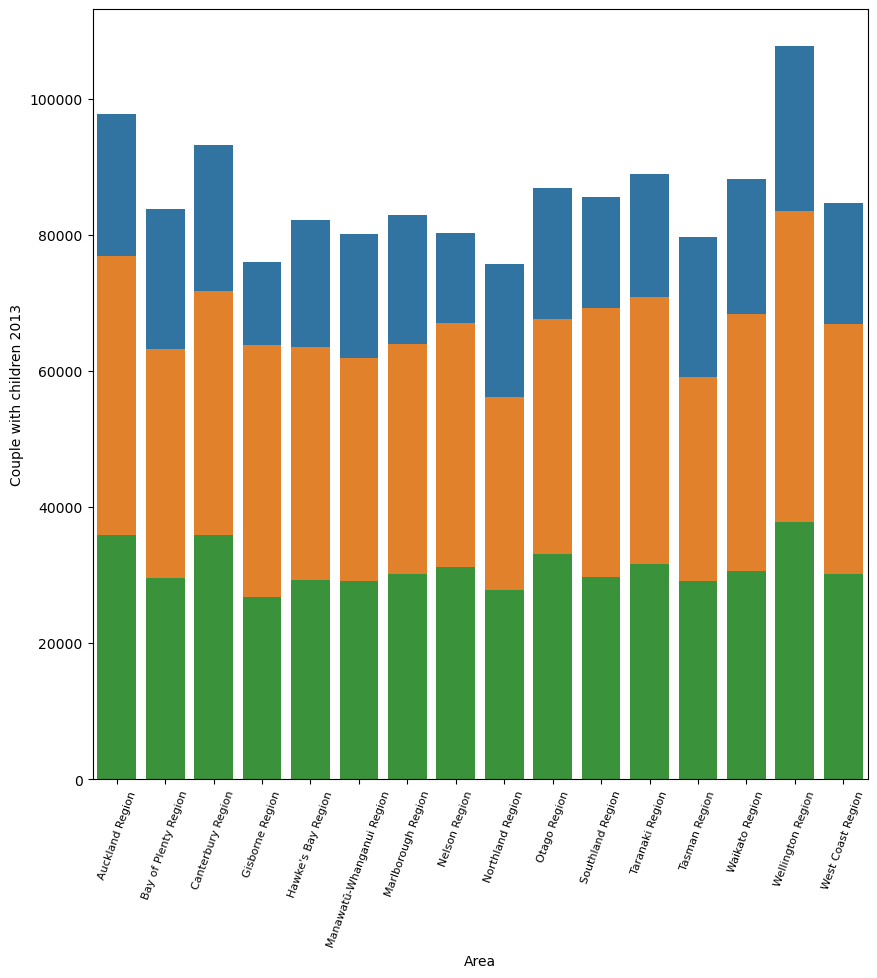

In [541]:
fig, ax = plt.subplots(figsize=(10,10))
plt.xticks(rotation=70,fontsize=8)
sns.barplot(data=df_median_ordered,x='Area',y='Couple with children 2013',errorbar=None)
sns.barplot(data=df_median_ordered,x='Area',y='Couple without children 2013',errorbar=None)
sns.barplot(data=df_median_ordered,x='Area',y='One parent with child(ren) 2013',errorbar=None)

<Axes: xlabel='Area', ylabel='Couple with children 2018'>

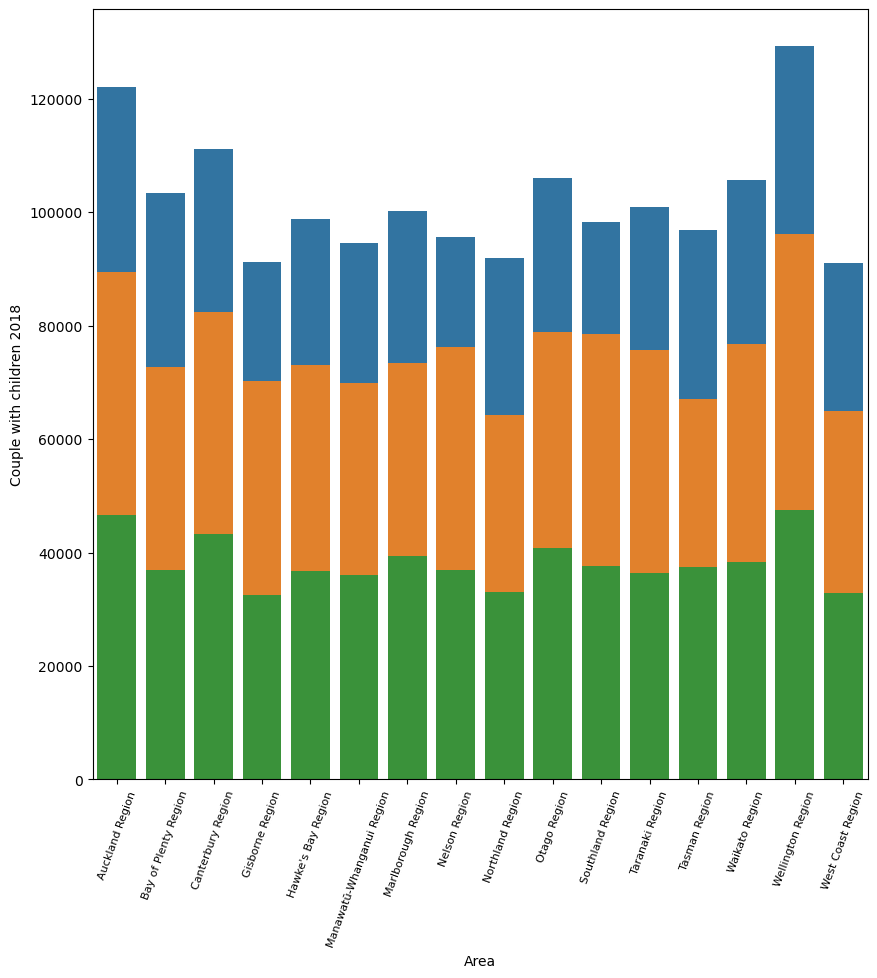

In [542]:
fig, ax = plt.subplots(figsize=(10,10))
plt.xticks(rotation=70,fontsize=8)
sns.barplot(data=df_median_ordered,x='Area',y='Couple with children 2018',errorbar=None)
sns.barplot(data=df_median_ordered,x='Area',y='Couple without children 2018',errorbar=None)
sns.barplot(data=df_median_ordered,x='Area',y='One parent with child(ren) 2018',errorbar=None)

<Axes: xlabel='Area', ylabel='Couple with children 2023'>

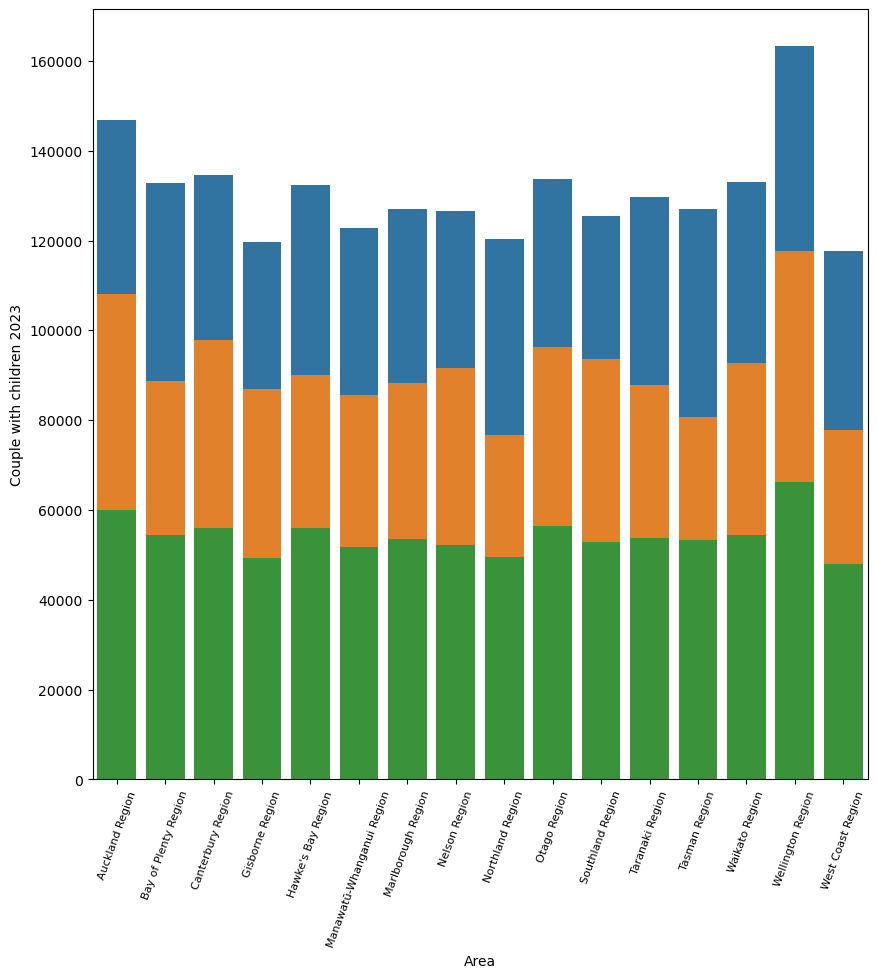

In [543]:
fig, ax = plt.subplots(figsize=(10,10))
plt.xticks(rotation=70,fontsize=8)
sns.barplot(data=df_median_ordered,x='Area',y='Couple with children 2023',errorbar=None)
sns.barplot(data=df_median_ordered,x='Area',y='Couple without children 2023',errorbar=None)
sns.barplot(data=df_median_ordered,x='Area',y='One parent with child(ren) 2023',errorbar=None)

In [547]:
df_median.to_csv('NZ_Income_Median.csv')
df.to_csv('NZ_Income.csv')

In [548]:
df_median.head()

ID,Census year,Area,Family type,Observation Value
0,2013,Northland Region,Couple without children,56200.0
1,2013,Northland Region,Couple with children,75800.0
2,2013,Northland Region,One parent with child(ren),27800.0
3,2013,Auckland Region,Couple without children,76900.0
4,2013,Auckland Region,Couple with children,97800.0


<Axes: xlabel='Area', ylabel='Observation Value'>

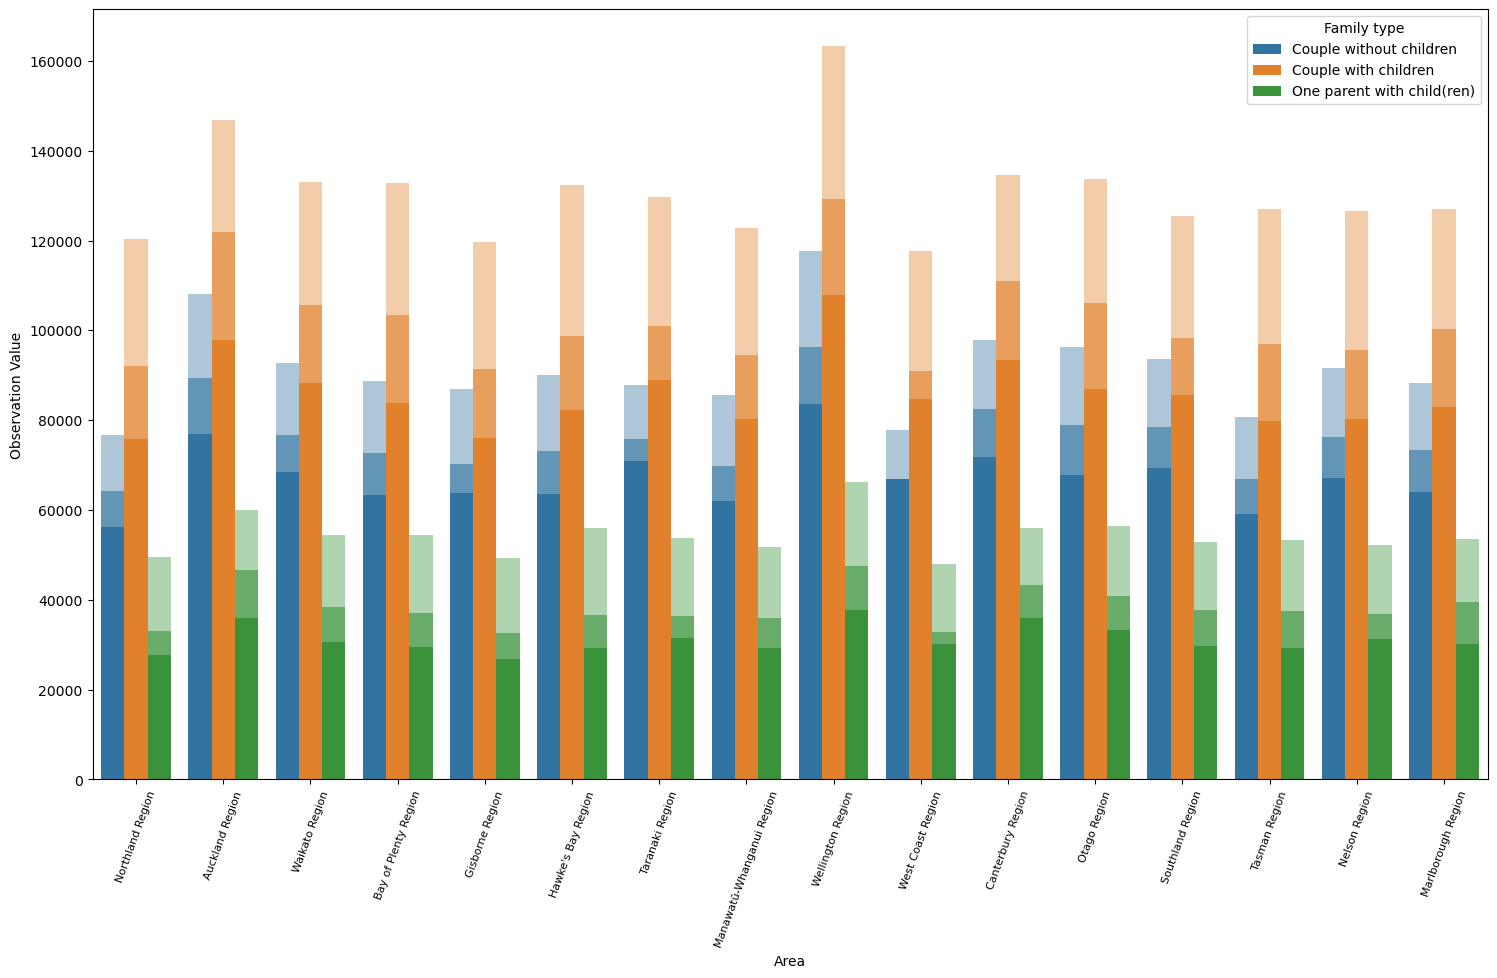

In [549]:
fig, ax = plt.subplots(figsize=(18,10))
plt.xticks(rotation=70,fontsize=8)
sns.barplot(data=df_mediannp2023,x='Area',y='Observation Value',hue='Family type',errorbar=None,alpha=0.4,legend=False)
sns.barplot(data=df_mediannp2018,x='Area',y='Observation Value',hue='Family type',errorbar=None,alpha=0.6, legend=False)
sns.barplot(data=df_mediannp2013,x='Area',y='Observation Value',hue='Family type',errorbar=None)


In [550]:
df_median

ID,Census year,Area,Family type,Observation Value
0,2013,Northland Region,Couple without children,56200.0
1,2013,Northland Region,Couple with children,75800.0
2,2013,Northland Region,One parent with child(ren),27800.0
3,2013,Auckland Region,Couple without children,76900.0
4,2013,Auckland Region,Couple with children,97800.0
...,...,...,...,...
139,2023,Nelson Region,Couple with children,126600.0
140,2023,Nelson Region,One parent with child(ren),52200.0
141,2023,Marlborough Region,Couple without children,88200.0
142,2023,Marlborough Region,Couple with children,127000.0


<Axes: xlabel='Area', ylabel='Observation Value'>

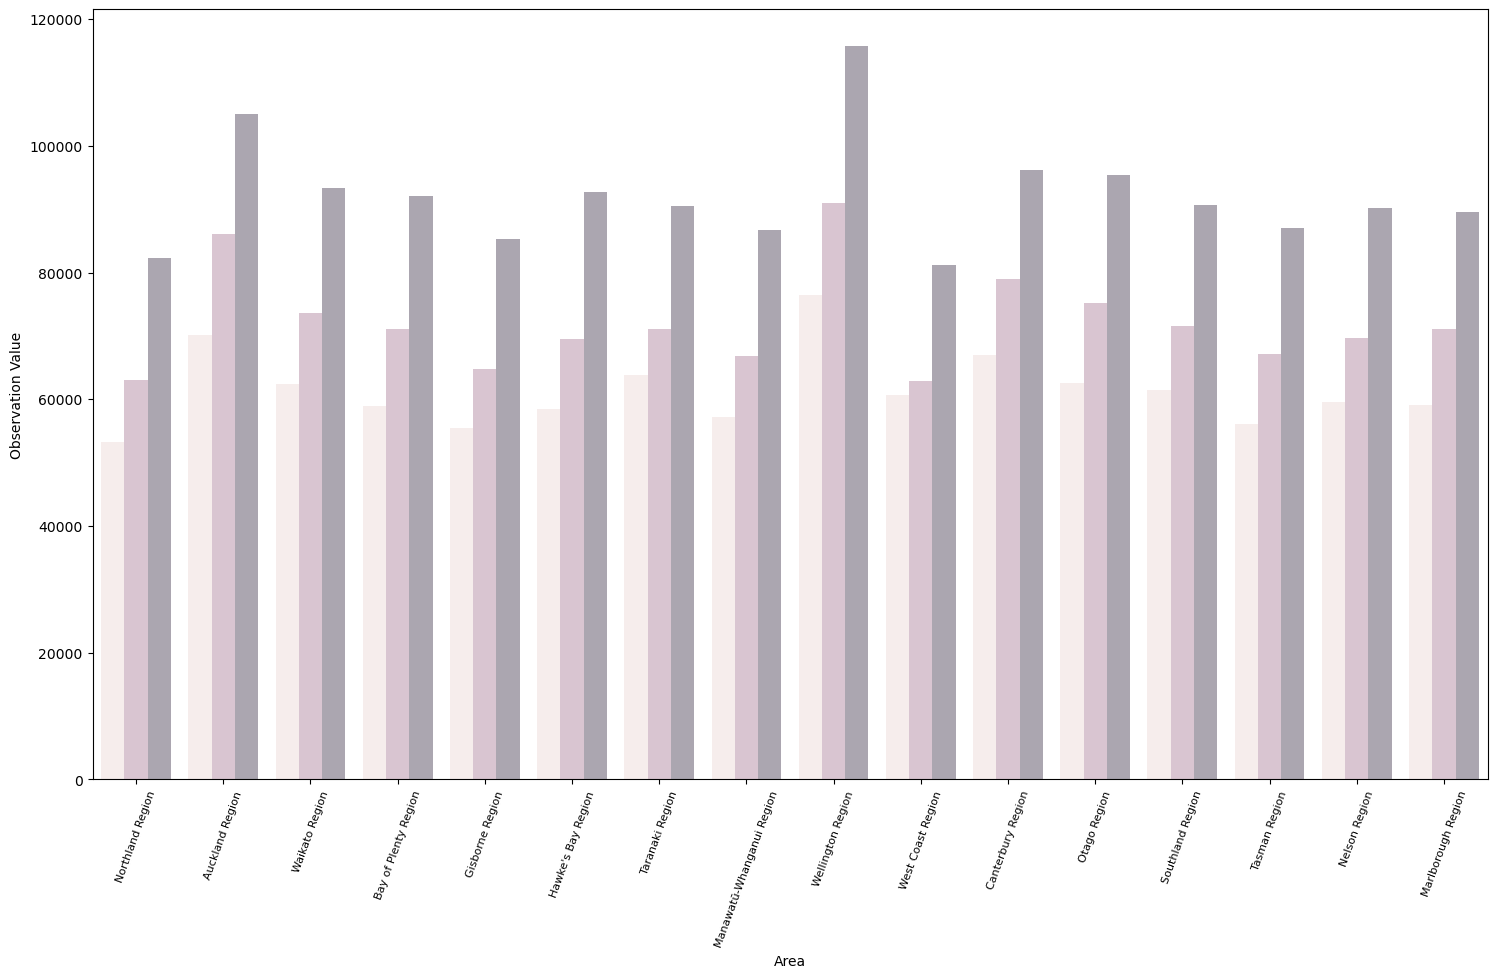

In [551]:
fig, ax = plt.subplots(figsize=(18,10))
plt.xticks(rotation=70,fontsize=8)
sns.barplot(data=df_median,x='Area',y='Observation Value',hue='Census year',errorbar=None,alpha=0.4,legend=False)

In [552]:
filter = df_median['Census year'] == 2013
df_median_2013 = df_median[filter]
df_median_2013.reset_index(inplace = True, drop = True)
df_median_2013 = df_median_2013.pivot(index='Area', columns='Family type', values = 'Observation Value')
df_median_2013

Family type,Couple with children,Couple without children,One parent with child(ren)
Area,,,
Auckland Region,97800.0,76900.0,35900.0
Bay of Plenty Region,83800.0,63300.0,29600.0
Canterbury Region,93300.0,71800.0,36000.0
Gisborne Region,76000.0,63800.0,26800.0
Hawke's Bay Region,82300.0,63600.0,29300.0
Manawatū-Whanganui Region,80200.0,62000.0,29200.0
Marlborough Region,82900.0,64000.0,30200.0
Nelson Region,80300.0,67100.0,31300.0
Northland Region,75800.0,56200.0,27800.0


In [553]:
filter = df_median['Census year'] == 2013
df_median_2013 = df_median[filter]
df_median_2013.reset_index(inplace = True, drop = True)
df_median_2013 = df_median_2013.pivot(index='Area', columns=['Family type'], values = 'Observation Value')
df_median_2013 = df_median_2013.reset_index()
df_median_2013['Year'] = 2013
df_median_2013

Family type,Area,Couple with children,Couple without children,One parent with child(ren),Year
0,Auckland Region,97800.0,76900.0,35900.0,2013
1,Bay of Plenty Region,83800.0,63300.0,29600.0,2013
2,Canterbury Region,93300.0,71800.0,36000.0,2013
3,Gisborne Region,76000.0,63800.0,26800.0,2013
4,Hawke's Bay Region,82300.0,63600.0,29300.0,2013
5,Manawatū-Whanganui Region,80200.0,62000.0,29200.0,2013
6,Marlborough Region,82900.0,64000.0,30200.0,2013
7,Nelson Region,80300.0,67100.0,31300.0,2013
8,Northland Region,75800.0,56200.0,27800.0,2013
9,Otago Region,87000.0,67700.0,33200.0,2013


In [554]:
filter = df_median['Census year'] == 2018
df_median_2018 = df_median[filter]
df_median_2018.reset_index(inplace = True, drop = True)
df_median_2018 = df_median_2018.pivot(index='Area', columns=['Family type'], values = 'Observation Value')
df_median_2018 = df_median_2018.reset_index()
df_median_2018['Year'] = 2018
df_median_2018

Family type,Area,Couple with children,Couple without children,One parent with child(ren),Year
0,Auckland Region,122000.0,89500.0,46700.0,2018
1,Bay of Plenty Region,103400.0,72700.0,37000.0,2018
2,Canterbury Region,111100.0,82400.0,43200.0,2018
3,Gisborne Region,91300.0,70300.0,32500.0,2018
4,Hawke's Bay Region,98800.0,73100.0,36700.0,2018
5,Manawatū-Whanganui Region,94600.0,69900.0,36000.0,2018
6,Marlborough Region,100300.0,73400.0,39400.0,2018
7,Nelson Region,95700.0,76300.0,36900.0,2018
8,Northland Region,92000.0,64300.0,33000.0,2018
9,Otago Region,106100.0,78900.0,40800.0,2018


In [555]:
filter = df_median['Census year'] == 2023
df_median_2023 = df_median[filter]
df_median_2023.reset_index(inplace = True, drop = True)
df_median_2023 = df_median_2023.pivot(index='Area', columns=['Family type'], values = 'Observation Value')
df_median_2023 = df_median_2023.reset_index()
df_median_2023['Year'] = 2023
df_median_2023

Family type,Area,Couple with children,Couple without children,One parent with child(ren),Year
0,Auckland Region,146900.0,108100.0,60000.0,2023
1,Bay of Plenty Region,132800.0,88800.0,54500.0,2023
2,Canterbury Region,134500.0,97800.0,56100.0,2023
3,Gisborne Region,119600.0,86900.0,49300.0,2023
4,Hawke's Bay Region,132400.0,90000.0,55900.0,2023
5,Manawatū-Whanganui Region,122900.0,85600.0,51800.0,2023
6,Marlborough Region,127000.0,88200.0,53600.0,2023
7,Nelson Region,126600.0,91600.0,52200.0,2023
8,Northland Region,120300.0,76800.0,49600.0,2023
9,Otago Region,133600.0,96300.0,56500.0,2023


In [556]:
df_final = df_median_2013._append(df_median_2018,ignore_index=True)

In [557]:
df_final = df_final._append(df_median_2023,ignore_index=True)

In [558]:
df_final.columns.name = 'ID'

In [559]:
df_final.head()

ID,Area,Couple with children,Couple without children,One parent with child(ren),Year
0,Auckland Region,97800.0,76900.0,35900.0,2013
1,Bay of Plenty Region,83800.0,63300.0,29600.0,2013
2,Canterbury Region,93300.0,71800.0,36000.0,2013
3,Gisborne Region,76000.0,63800.0,26800.0,2013
4,Hawke's Bay Region,82300.0,63600.0,29300.0,2013


<Axes: xlabel='Area', ylabel='Couple with children'>

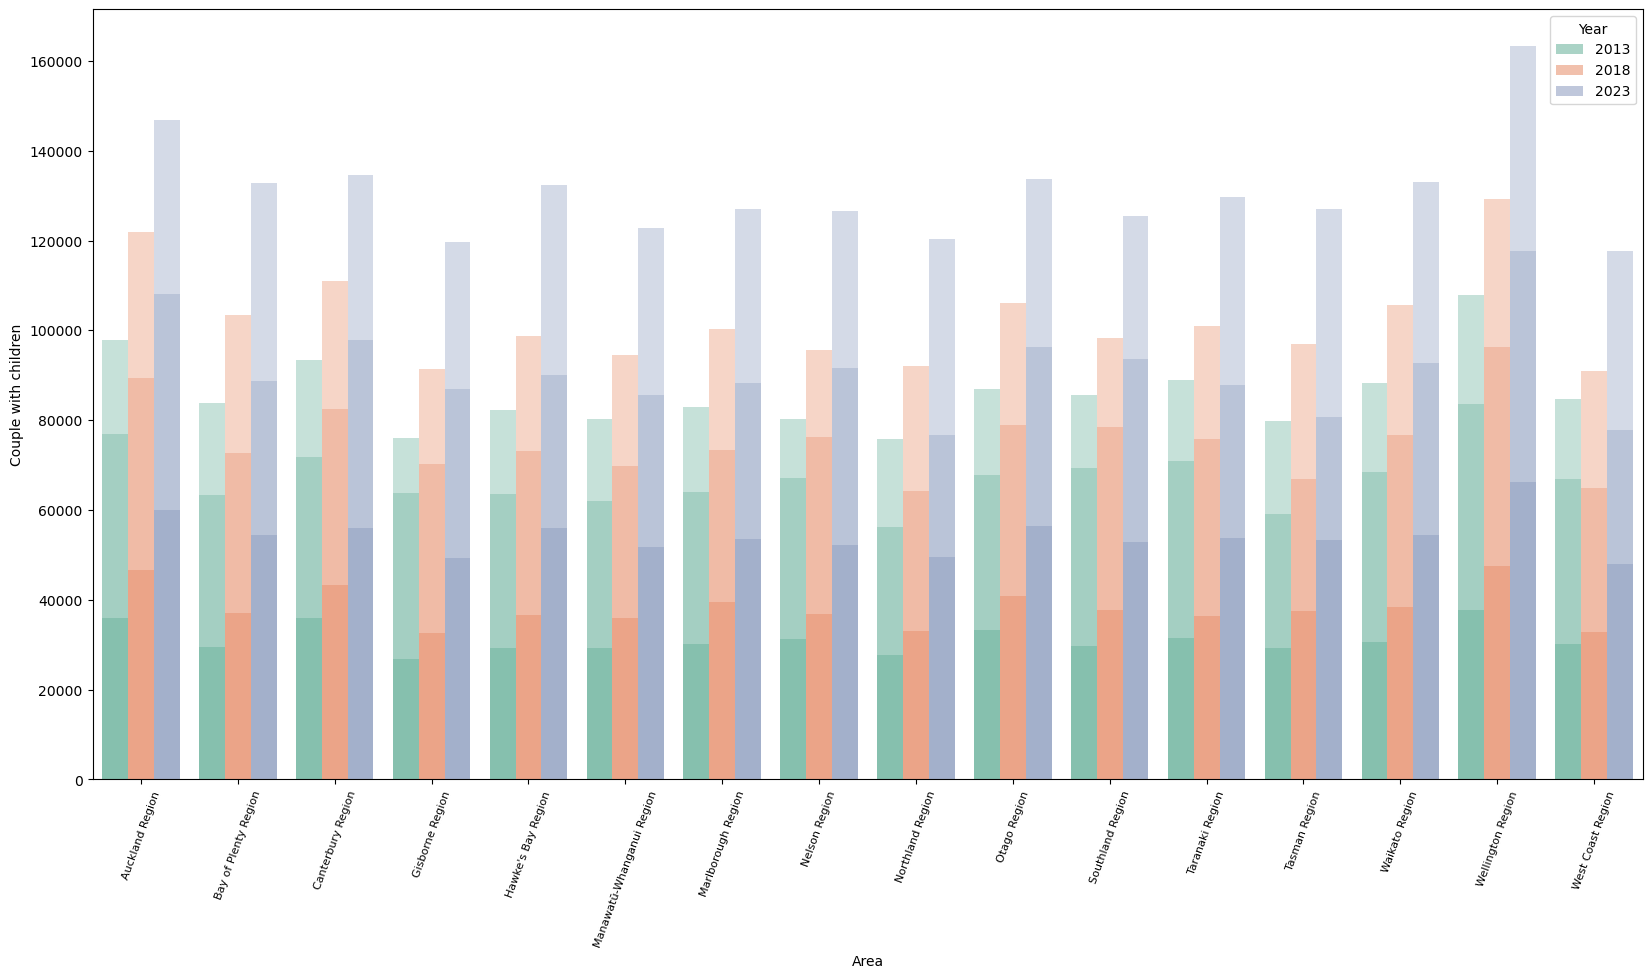

In [560]:
fig, ax = plt.subplots(figsize=(20,10))
plt.xticks(rotation=70,fontsize=8)
sns.barplot(data=df_final,x='Area',y='Couple with children',hue='Year',errorbar=None,alpha=0.4, legend=False, palette='Set2')
sns.barplot(data=df_final,x='Area',y='Couple without children',hue='Year',errorbar=None,alpha=0.4, legend=False, palette='Set2')
sns.barplot(data=df_final,x='Area',y='One parent with child(ren)',hue='Year',errorbar=None,alpha=0.6, legend=True, palette='Set2')